# HW 2 Simulation 555

1. Review lecture notes 1-4.

2. Write a code for one of the "static simulation" problems (your choice) from handouts 1-2.

Provide a brief discussion of the obtained statistical data. Visualize it graphically.

3. Complete two problems attached.

4. Write a code for one of the first three "dynamic simulation" problems (your choice) from handout 3.

Provide a brief discussion of the obtained statistical data. Visualize it graphically.

5. Modify problem 4 in handout 3:
   Assume now that if a service cannot be completed the second day, there is 90% chance it will be finished at the end of the next day, in which case your total charge is $\$2,100$. In case if the service isn't finished in three days, the truck is returned in the condition "not fixed", and the company receives only $1,000. In addition to the previously asked questions, provide statistics on the total number of trucks remaining "not fixed" during the testing period.

---

Please submit one pdf document with the short description of each solution, your code, and graphs. Additionally submit either .py or .m files you created.


In [1]:
import numpy as np
from numpy import random
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

---

## 2\. Handout1-Problem 1

You operate an aircraft that flies two flights per day: an "outbound" flight from its base to a remote destination, and then and "inbound" flight back again.

The aircraft can carry a mix of passengers and freight: if configured for all passengers, the aircraft holds 216 seats. Each freight pallet you configure the aircraft to hold takes away 24 seats, and you are considering setting up the aircraft to hold 0, 1, 2, 3, 4, 5, or 6 freight pallets.

The split between seats and space for pallets must be decided once a year when the aircraft undergoes "heavy maintenance"; it cannot be changed for each flight.

You make a profit of $50 for each passenger carried (in either direction), and demand for seats on the outbound flight is Poisson with a mean of 160, while demand for seats on the inbound flight is Poisson with a mean of 159 (independent of the outbound flight).

Demand for freight carriage is independent of passenger demand and also independent between the inbound and outbound flights.（see Pallet_Table)

You make a profit $275 per pallet carried (in either direction). What aircraft configuration maximizes the average profit per day?


### Set the parameters of the problem and generate the random variables


In [2]:
N = 10000
# number of pallets considered
n = np.arange(0, 7)

# seats_capacity = 216
# taken_by_each_pallet = 24
# passenger_profit = 50 / seat
# pallet_profit = 275 / pallet

In [3]:
# Pallets_Table
pallets_table = pd.DataFrame(
    {
        'outbound_pallets_prob': [0.06, 0.08, 0.18, 0.2, 0.21, 0.16, 0.11],
        'inbound_pallets_prob': [0.07, 0.09, 0.18, 0.19, 0.17, 0.16, 0.14]
    },
    index=n)

pallets_table

,outbound_pallets_prob,inbound_pallets_prob
0,0.06,0.07
1,0.08,0.09
2,0.18,0.18
3,0.20,0.19
4,0.21,0.17
5,0.16,0.16
6,0.11,0.14


In [4]:
demand_pal_out = stats.rv_discrete(
    name='pal_Out',
    values=(n, pallets_table['outbound_pallets_prob'])).rvs(size=N)

demand_pal_in = stats.rv_discrete(
    name='pal_In',
    values=(n, pallets_table['inbound_pallets_prob'])).rvs(size=N)

In [5]:
# demand for seats on the outbound flight is Poisson with a mean of 160
mu_out = 160

# demand for seats on the inbound flight is Poisson with a mean of 159
mu_in = 159

# Seats demand random variables

demand_seats_out = stats.poisson(mu_out).rvs(size=N)
demand_seats_in = stats.poisson(mu_in).rvs(size=N)

### Considering setting up the aircraft to hold 0, 1, 2, 3, 4, 5, or 6 freight pallets


In [6]:
# When there is 0 freight pallet in the plane.
# Pallets sale = min(demand_pallets and 0),thus:

pallets_out_sale = 0
pallets_in_sale = 0

In [7]:
# number_of_seats_In_and_Out_available = seats_capacity = 216
seats_out_sale = np.minimum(demand_seats_out, np.ones(N) * 216)
seats_in_sale = np.minimum(demand_seats_in, np.ones(N) * 216)

seats_out_sale, seats_in_sale

(array([132., 153., 171., ..., 170., 177., 154.]),
 array([163., 139., 172., ..., 165., 164., 152.]))

In [8]:
profit_out = seats_out_sale * 50
profit_in = seats_in_sale * 50

profit_total = profit_out + profit_in
mean_profit_0 = np.mean(profit_total)

print(
    f"When there is 0 freight pallet in the plane.\nthe mean of the profit is {mean_profit_0}"
)

When there is 0 freight pallet in the plane.
the mean of the profit is 15954.17


In [9]:
# 0<= i <=9
def mean_profit(i, seats_capacity=216):
    pallets_out_sale = np.minimum(demand_pal_out, np.ones(N) * i)
    pallets_in_sale = np.minimum(demand_pal_in, np.ones(N) * i)

    # number_of_seats_in_and_out_available = seats_capacity - taken_by_each_pallet

    seats_out_available = seats_capacity - pallets_out_sale * 24
    seats_out_sale = np.minimum(demand_seats_out, seats_out_available)

    seats_in_available = seats_capacity - pallets_in_sale * 24
    seats_in_sale = np.minimum(demand_seats_in, seats_in_available)

    profit_out = seats_out_sale * 50 + pallets_out_sale * 275
    profit_in = seats_in_sale * 50 + pallets_in_sale * 275

    profit_total = profit_out + profit_in
    mean_profit = np.mean(profit_total)
    return mean_profit

In [10]:
result_profits = np.empty(6)
result_profits = np.round([*map(mean_profit, range(1, 7))], 2)
print(
    f"The highest profit is {np.max(result_profits)}, when there are {np.argmax(result_profits)+1} pallets in the plane,the profits plot is displayed below"
)

The highest profit is 16774.11, when there are 2 pallets in the plane,the profits plot is displayed below


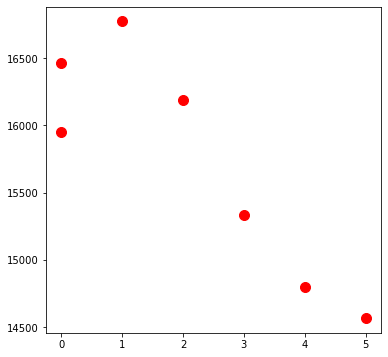

In [11]:
_, ax = plt.subplots(figsize=(6, 6))

for i in range(6):
    ax.plot(i, result_profits[i], 'ro', markersize=10)

ax.plot(0, mean_profit_0, 'ro', markersize=10)

plt.show()

---

## 3\. Complete two problems attached.

### Q3-Problem 1

You make a perishable, volatile chemical for which you charge $2.25 per liter.

You have 75 regular customers for the chemical, each of whom has an independent 90% chance of placing an order on any given day. You also get an average of 30 orders per day from other, non-regular customers; assume the number of non-regular customers per day has a Poisson distribution.

Every order is for one 20-liter container. You produce the chemical by a process that produces 600 liters of the chemical at a cost of $1300.

Each day, you can run the process any whole number of times. Because it is so unstable, any chemical left unsold at the end of the day must be recycled, at a cost of $0.35 per liter.

What is the best number of times to run the process?

(Consider four possible policies of running the process 1, 2, 3 or 4 times.)


### Define the scenarios


In [12]:
# produce the chemical by a process that produces 600 liters of the chemical at a cost of $1300.
# Consider four possible policies of running the process 1, 2, 3 or 4 times.
# The process is described by the following dictionaries:
scen_param = {
    1: (600, 1300),
    2: (1200, 2600),
    3: (1800, 3900),
    4: (2400, 5200)
}

In [13]:
class chemSim:
    """simulate the chemical producing process for 100 days
    where : scen_param = { 1:(600, 1300), 2:(1200, 2600), 3:(1800, 3900), 4:(2400, 5200)}
    """

    def __init__(self, scen_param=[i]):
        self.days = 100
        self.scen_param = {
            1: (600, 1300),
            2: (1200, 2600),
            3: (1800, 3900),
            4: (2400, 5200)
        }

    def chem_df(self, i):
        regular_order = stats.binom.rvs(75, 0.9, size=self.days)
        non_regular_order = stats.poisson.rvs(30, size=self.days)

        chem_prod_sim_df = pd.DataFrame({
            'regular_L': regular_order * 20,
            'non_regular_L': non_regular_order * 20,
            'left_cost': np.zeros(self.days),
            'produce': self.scen_param[i][0],
            'cost': self.scen_param[i][1],
            'sale': np.zeros(self.days)
        })

        #### I want to split the def here

        chem_prod_sim_df_1 = chem_prod_sim_df.copy()
        chem_prod_sim_df_1.query(expr='regular_L + non_regular_L > produce',
                                 inplace=True)
        chem_prod_sim_df_1['sale'] = chem_prod_sim_df_1['produce'] * 2.25

        chem_prod_sim_df_2 = chem_prod_sim_df.copy()
        chem_prod_sim_df_2.query(expr='regular_L + non_regular_L <= produce',
                                 inplace=True)
        chem_prod_sim_df_2['sale'] = (
            chem_prod_sim_df_2['regular_L'] +
            chem_prod_sim_df_2['non_regular_L']) * 2.25
        chem_prod_sim_df_2['left_cost'] = (
            chem_prod_sim_df_2['produce'] -
            (chem_prod_sim_df_2['regular_L'] +
             chem_prod_sim_df_2['non_regular_L'])) * 0.35

        chem_prod_sim_df = pd.concat([chem_prod_sim_df_1, chem_prod_sim_df_2])
        chem_prod_sim_df['profit'] = chem_prod_sim_df['sale'] - (
            chem_prod_sim_df['cost'] + chem_prod_sim_df['left_cost'])

        return chem_prod_sim_df

#### Simulate the process for each of the four policies for 100 days:


In [14]:
# 1 time of the producing proces in 100 days.
chemSim().chem_df(1)

,regular_L,non_regular_L,left_cost,produce,cost,sale,profit
0,1280,640,0.0,600,1300,1350.0,50.0
1,1320,940,0.0,600,1300,1350.0,50.0
2,1400,720,0.0,600,1300,1350.0,50.0
3,1360,760,0.0,600,1300,1350.0,50.0
4,1400,760,0.0,600,1300,1350.0,50.0
...,...,...,...,...,...,...,...
95,1340,600,0.0,600,1300,1350.0,50.0
96,1320,660,0.0,600,1300,1350.0,50.0
97,1440,460,0.0,600,1300,1350.0,50.0
98,1320,660,0.0,600,1300,1350.0,50.0


In [15]:
# 2 times of the producing proces in 100 days.
chemSim().chem_df(2)

,regular_L,non_regular_L,left_cost,produce,cost,sale,profit
0,1360,620,0.0,1200,2600,2700.0,100.0
1,1400,460,0.0,1200,2600,2700.0,100.0
2,1380,760,0.0,1200,2600,2700.0,100.0
3,1380,620,0.0,1200,2600,2700.0,100.0
4,1320,460,0.0,1200,2600,2700.0,100.0
...,...,...,...,...,...,...,...
95,1400,620,0.0,1200,2600,2700.0,100.0
96,1340,440,0.0,1200,2600,2700.0,100.0
97,1320,600,0.0,1200,2600,2700.0,100.0
98,1440,600,0.0,1200,2600,2700.0,100.0


In [16]:
# 3 times of the producing proces in 100 days.
chemSim().chem_df(3)

,regular_L,non_regular_L,left_cost,produce,cost,sale,profit
0,1260,700,0.0,1800,3900,4050.0,150.0
1,1380,540,0.0,1800,3900,4050.0,150.0
2,1380,680,0.0,1800,3900,4050.0,150.0
4,1220,620,0.0,1800,3900,4050.0,150.0
5,1360,520,0.0,1800,3900,4050.0,150.0
...,...,...,...,...,...,...,...
74,1240,560,0.0,1800,3900,4050.0,150.0
83,1340,440,7.0,1800,3900,4005.0,98.0
89,1260,440,35.0,1800,3900,3825.0,-110.0
92,1320,440,14.0,1800,3900,3960.0,46.0


In [17]:
# 4 times of the producing proces in 100 days.
chemSim().chem_df(4)

,regular_L,non_regular_L,left_cost,produce,cost,sale,profit
0,1360,760,98.0,2400,5200,4770.0,-528.0
1,1460,660,98.0,2400,5200,4770.0,-528.0
2,1380,780,84.0,2400,5200,4860.0,-424.0
3,1400,520,168.0,2400,5200,4320.0,-1048.0
4,1340,480,203.0,2400,5200,4095.0,-1308.0
...,...,...,...,...,...,...,...
95,1280,620,175.0,2400,5200,4275.0,-1100.0
96,1360,640,140.0,2400,5200,4500.0,-840.0
97,1360,700,119.0,2400,5200,4635.0,-684.0
98,1360,700,119.0,2400,5200,4635.0,-684.0


In [18]:
result_mean_profit = np.empty(shape=(5, 2))

for i in range(1, 5):
    result_mean_profit[i, :] = (i, chemSim().chem_df(i).profit.mean().round(2))

print("The mean proifts of each scenatio is:")
result_mean_profit

The mean proifts of each scenatio is:


array([[ 0.00000e+000,  4.94066e-324],
       [ 1.00000e+000,  5.00000e+001],
       [ 2.00000e+000,  1.00000e+002],
       [ 3.00000e+000,  1.31280e+002],
       [ 4.00000e+000, -1.00692e+003]])

In [19]:
print(
    f"\nSo,if there are {np.argmax(result_mean_profit) + 1} times of running the process,the highest profit is {np.max(result_mean_profit)}."
)


So,if there are 8 times of running the process,the highest profit is 131.28.


### Q3-Problem 2

The management of a hotel is considering renting a portable filtration unit to process the water to make it drinkable. There are three possible filtration units:

<style>
table
{
    margin: auto;
}
</style>

|                    |  Unit1  |  Unit2   |  Unit3   |
| :----------------: | :-----: | :------: | :------: |
| Capacity (Gallons) |   800   |   900    |   1000   |
|        Cost        | $\$800$ | $\$1000$ | $\$1300$ |

They are also considering not renting a filtration unit. If they don’t rent a unit, or if the unit’s capacity turns out to be insufficient to meet the hotel guests’ demand for water, the hotel will have to supply bottled water to every occupied room.Providing bottled water will cost the hotel a flat fee of $450, plus $5 per occupied room.The hotel has 250 rooms.

At present, they have 200 room reservations they consider “firm”, with a negligible chance of cancellation.

They have another 35 reservations they consider “doubtful”, each with an independent 65% chance of resulting in an occupied room.

They also expect to get some “last minute” requests for rooms, which they estimate to be Poisson with a mean of 30.

Occupied rooms consume random amounts of water independently from one another.

Each occupied room consumes the amount of water that is distributed according to the normal distribution with an average of 4 gallons of water and a standard deviation of 3.1.

Find an optimal plan for the management and also the probability of not having enough filtered water to meet this optimal demand.


#### Analysis

As the bottle water is the suppliment of the hotel filter-drinking system,there are four scenarios:

- Unit1, Unit2, Unit3 and All bottle water with no unit.

Thus we can define the scenarios(scenario,capacity of water, cost) as below:


In [20]:
# we would like to simulate each condition in 1000 days
num_days = 1000

total_rooms = 250
firm_rooms = 200

binom_rooms = stats.binom.rvs(35, 0.65, size=num_days)
lastMin_rooms = np.minimum(50 - binom_rooms,
                           stats.poisson.rvs(30, size=num_days))

day_rooms = 200 + binom_rooms + lastMin_rooms

#### halfnormal????


In [21]:
room_consumption = (stats.halfnorm(loc=4,
                                    scale=3.1).rvs(size=day_room).astype(int)
                    for day_room in day_rooms)

water_consumption = (room_consum.sum() for room_consum in room_consumption)

In [22]:
water_consumption_df = pd.DataFrame({
    'room_booked': day_rooms,
    'water_consumption': water_consumption
})

water_consumption_df[
    'shortage_Unit1_800'] = water_consumption_df['water_consumption'] - 800
water_consumption_df['shortage_Unit1_800_ratio'] = round(
    water_consumption_df['shortage_Unit1_800'] /
    water_consumption_df['water_consumption'], 2)

water_consumption_df[
    'shortage_Unit2_900'] = water_consumption_df['water_consumption'] - 900

water_consumption_df['shortage_Unit2_900_ratio'] = round(
    water_consumption_df['shortage_Unit2_900'] /
    water_consumption_df['water_consumption'], 2)

water_consumption_df[
    'shortage_Unit3_1000'] = water_consumption_df['water_consumption'] - 1000

water_consumption_df['shortage_Unit3_1000_ratio'] = round(
    water_consumption_df['shortage_Unit3_1000'] /
    water_consumption_df['water_consumption'], 2)

water_consumption_df[
    'bottle_water_fee'] = water_consumption_df['room_booked'] * 5

water_consumption_df

,room_booked,water_consumption,shortage_Unit1_800,shortage_Unit1_800_ratio,shortage_Unit2_900,shortage_Unit2_900_ratio,shortage_Unit3_1000,shortage_Unit3_1000_ratio,bottle_water_fee
0,250,1476,676,0.46,576,0.39,476,0.32,1250
1,249,1494,694,0.46,594,0.40,494,0.33,1245
2,249,1501,701,0.47,601,0.40,501,0.33,1245
3,245,1523,723,0.47,623,0.41,523,0.34,1225
4,250,1488,688,0.46,588,0.40,488,0.33,1250
...,...,...,...,...,...,...,...,...,...
995,250,1476,676,0.46,576,0.39,476,0.32,1250
996,250,1528,728,0.48,628,0.41,528,0.35,1250
997,250,1523,723,0.47,623,0.41,523,0.34,1250
998,250,1483,683,0.46,583,0.39,483,0.33,1250


In [23]:
water_consumption_df.describe()

,room_booked,water_consumption,shortage_Unit1_800,shortage_Unit1_800_ratio,shortage_Unit2_900,shortage_Unit2_900_ratio,shortage_Unit3_1000,shortage_Unit3_1000_ratio,bottle_water_fee
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,248.677000,1488.923000,688.923000,0.462420,588.923000,0.395360,488.923000,0.328180,1243.385000
std,2.571241,32.840212,32.840212,0.012325,32.840212,0.013692,32.840212,0.015249,12.856207
min,236.000000,1331.000000,531.000000,0.400000,431.000000,0.320000,331.000000,0.250000,1180.000000
25%,248.750000,1468.000000,668.000000,0.460000,568.000000,0.390000,468.000000,0.320000,1243.750000
50%,250.000000,1489.500000,689.500000,0.460000,589.500000,0.400000,489.500000,0.330000,1250.000000
75%,250.000000,1511.000000,711.000000,0.470000,611.000000,0.400000,511.000000,0.340000,1250.000000
max,250.000000,1586.000000,786.000000,0.500000,686.000000,0.430000,586.000000,0.370000,1250.000000


In [24]:
bottle_water_mean = water_consumption_df['bottle_water_fee'].mean() + 450
bottle_water_mean

1693.385

In [25]:
# define the scenario of bottle water only later since it meet all the demand of water consumption in the hotel.

scen_param = pd.DataFrame({
    1: (800, 800),
    2: (900, 1000),
    3: (1000, 1300),
    4: (np.infty, 450)
}).T
scen_param

,0,1
1,800.0,800.0
2,900.0,1000.0
3,1000.0,1300.0
4,inf,450.0


In [26]:
scen_param['uinit_cost'] = scen_param.iloc[:3, 0] + bottle_water_mean
scen_param['all_water_cost'] = bottle_water_mean
scen_param

,0,1,uinit_cost,all_water_cost
1,800.0,800.0,2493.385,1693.385
2,900.0,1000.0,2593.385,1693.385
3,1000.0,1300.0,2693.385,1693.385
4,inf,450.0,NaN,1693.385


In [27]:
# _, ax = plt.subplots(figsize=(8, 6))

# ax.bar(range(4), cost_ls, color='blue')
# ax.set(xticks=np.arange(4),
#        xticklabels=['Unit1', 'Unit2', 'Unit3', 'All bottle water'],
#        xlabel='Scenario',
#        ylabel='Cost',
#        title='Cost of each scenario')

# plt.show()

---

## 4\. Write a code for one of the first three "dynamic simulation" problems (your choice) from handout 3.


### Handout 3 Problem 1

The Gotham Taxi Company has a fleet of 500 taxicabs. On any given day of use, a taxi has an 0.4% chance of breaking down. Broken-down taxis are towed overnight to the company repair shop. They return to service the day after they are fixed. Each day a taxi spends in the shop costs the company $350 in lost profits.
There are three mechanics Gotham is considering hiring to work in the repair shop: Larry, Moe and Curly. Each can fix one to three taxis per day.

- Larry would cost the company $300 per day. On any given day, there is 20% probability he can only fix one taxi, and a 40% probability he will be able to fix either two or three.

- Moe costs $250 per day. He has an equal probability of being able to fix either one, two, or three taxis on any given day.

- Curly costs $200 per day. On any given day, there is a 50% chance he can fix only one cab, a 30% chance he will be able fix two, and a 20% chance that he will be able to fix three.

The company may hire any combination of the three mechanics: any one, any two, or all three.

**Explain why you can tell, prior to performing any simulation, that the option of hiring just Curly will not be workable. ** `explain this`

Simulate each possibility by **200 trials of 100 days** each. Which possibility gives them the lowest average cost? What is the average number of taxis in the shop when you adopt this policy?


In [28]:
from itertools import product

In [29]:
def hires(*cols):
    '''
    Assigns a 0-1 matrix for each cols
    '''
    matrix_0_1 = product([0, 1], repeat=len(cols))
    assign_df = pd.DataFrame([*matrix_0_1], columns=cols)
    # drop [0, 0, 0]
    hr_df = assign_df.iloc[1:, :]
    return hr_df


hr_df = hires('Larry', 'Curly', 'Moe')
hr_df

,Larry,Curly,Moe
1,0,0,1
2,0,1,0
3,0,1,1
4,1,0,0
5,1,0,1
6,1,1,0
7,1,1,1


#### def repairTrials_dic()


In [30]:
def repairs(names, cars, probs, days=101):

    repair_dict = {}

    for name, car, prob in zip(names, cars, probs):
        repair_dict[name] = stats.rv_discrete(values=(car,
                                                      prob)).rvs(size=days)

    repairshop_df = pd.DataFrame(repair_dict)
    return repairshop_df


names = ('Larry', 'Curly', 'Moe')
cars = ((1, 2, 3), (1, 2, 3), (1, 2, 3))
probs = ((0.2, 0.4, 0.4), (1 / 3, 1 / 3, 1 / 3), (0.5, 0.3, 0.2))

repairs(names, cars, probs)

,Larry,Curly,Moe
0,2,3,3
1,2,3,1
2,2,3,3
3,3,1,3
4,2,1,3
...,...,...,...
96,3,1,3
97,3,2,3
98,2,1,1
99,3,1,2


In [31]:
repair_df = repairs(names, cars, probs)
repairs = repair_df.dot(hr_df.T)
repairs

,1,2,3,4,5,6,7
0,1,1,2,2,3,3,4
1,2,1,3,2,4,3,5
2,1,1,2,2,3,3,4
3,2,2,4,2,4,4,6
4,2,2,4,2,4,4,6
...,...,...,...,...,...,...,...
96,3,1,4,1,4,2,5
97,1,2,3,1,2,3,4
98,1,2,3,3,4,5,6
99,1,2,3,3,4,5,6


In [32]:
def broken(strategy, seed=None, days=101):
    if seed:
        random.seed(seed)

    broken_base = stats.binom(n=500, p=0.004).rvs(size=days)

    broken_df = pd.DataFrame({
        'broken_base': broken_base,
        'repair_0': repairs.loc[:, strategy]
    })

    # 逐行遍历
    remains = 0
    for day in range(0, broken_df.shape[0]):
        # 当日坏车数量 + 此前剩余量
        daily_broken = broken_df.loc[day, 'broken_base'] + remains
        # 当日维修能力
        daily_repair = broken_df.loc[day, 'repair_0']

        # 维修能力<=坏车数量
        if daily_broken >= daily_repair:

            # 当日坏车剩余量 = 当日坏车数量 - 当日维修能力
            remains = daily_broken - daily_repair

        # 维修能力>坏车数量，坏车数量归零
        else:
            remains = 0

        # 记录当日坏车剩余量
        broken_df.loc[day, 'broken_remain'] = remains

    return broken_df


broken_df = broken(3)
broken_df

,broken_base,repair_0,broken_remain
0,1,2,0.0
1,2,3,0.0
2,1,2,0.0
3,2,4,0.0
4,3,4,0.0
...,...,...,...
96,2,4,0.0
97,6,3,3.0
98,0,3,0.0
99,2,3,0.0


In [33]:
from multiprocess import Pool

In [34]:
def broken_mean(strategy, seed=None, days=101, trials=1000):

    remain_df = broken(strategy, seed=seed, days=days)['broken_remain']

    for trials in range(trials - 1):
        remain_df += broken(strategy)['broken_remain']

    df_mean = np.ceil(remain_df / trials)
    return df_mean


with Pool(10) as pool:
    broken_means = pool.map(broken_mean, range(1, 8))

broken_means_df = pd.DataFrame(broken_means).T
broken_means_df.columns = [f'broken_remain_{stg}' for stg in range(1, 8)]
broken_means_df

,broken_remain_1,broken_remain_2,broken_remain_3,broken_remain_4,broken_remain_5,broken_remain_6,broken_remain_7
0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
1,2.0,3.0,1.0,1.0,1.0,1.0,1.0
2,3.0,4.0,1.0,2.0,1.0,1.0,1.0
3,3.0,4.0,1.0,2.0,1.0,1.0,1.0
4,3.0,4.0,1.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
96,45.0,11.0,1.0,9.0,1.0,1.0,1.0
97,46.0,11.0,1.0,10.0,1.0,1.0,1.0
98,47.0,11.0,1.0,9.0,1.0,1.0,1.0
99,48.0,11.0,1.0,8.0,1.0,1.0,1.0


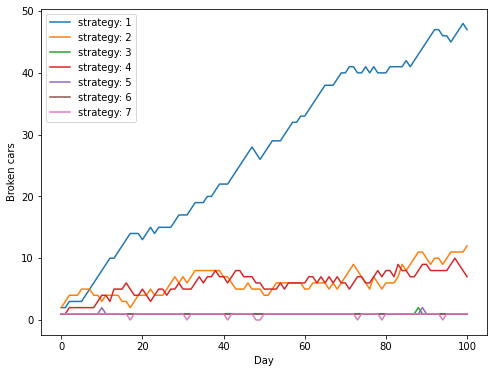

In [35]:
_, ax = plt.subplots(figsize=(8, 6))

for i in range(7):
    df_mean = broken_means_df[f'broken_remain_{i+1}']
    t = np.arange(0, 101)
    ax.plot(df_mean, label=f'strategy: {i+1}')

ax.set(xlabel='Day', ylabel='Broken cars')
ax.legend()

---

## 5\. Modify problem 4 in handout 3:

Assume now that if a service cannot be completed the second day, there is 90% chance it will be finished at the end of the next day, in which case your total charge is $\$2,100$.

In case if the service isn't finished in three days, the truck is returned in the condition "not fixed", and the company receives only $1,000. In addition to the previously asked questions, provide statistics on the total number of trucks remaining "not fixed" during the testing period.

<style>
table
{
    margin: auto;
}
</style>

#### Original Problem

You manage the Big-Rig Service Center, which runs a thriving business performing repairs on large trucks.

The number of trucks arriving at the facility in need of repair each morning is well-modeled by a Poisson random variable with a mean value of 3.8.

If you have a free service bay available for an arriving truck, you start servicing it immediately.

Trucks that you cannot immediately accommodate with a free service bay do not wait, but go to a competitor’s facility instead.

You currently have 5 service bays, but since you frequently have to turn away business, you are considering expanding to **6, 7, or possibly 8 bays.**

Including debt service, insurance, and taxes, your costs for these expansion options, converted to a daily payment, would be:

|   Total Bays   | Daily Cost |
| :------------: | :--------: |
| 6 (add 1 bay)  |  $\$175$   |
| 7 (add 2 bays) |  $\$325$   |
| 8 (add 3 bays) |  $\$475$   |

Repairing each truck can take either 1, 2, or 3 full days; and you cannot tell in advance how long the work will take.

There is a 30% chance that a truck can be completed by the end of one day, in which case you charge $800.

Given that service cannot be completed the first day, there is 75% chance it will be finished at the end of the next day, in which case your total charge is $1,500.

Otherwise, completing the service takes three full days or work, for which you charge $2,100.

Your operating costs are $425 per occupied service bay per day.

Should you expand your facility, and if so, how many service bays should you add? With this number of bays, what is the average number of service requests denied per day?


In [36]:
# make 1000 trials for 100 days for different scenarios
N = 1000

cost_bay_scenarios = {5: 0, 6: 175, 7: 325, 8: 475}

# number of days
n_days = 100

In [37]:
from itertools import repeat

In [38]:
np.array([1, 1 / 2, 1 / 3]) * np.array([6, 7, 8])


array([6.        , 3.5       , 2.66666667])

In [39]:
def bay_repairs(names, cars, probs, days=101):

    repair_dict = {}

    for name, car, prob in zip(names, cars, probs):
        repair_dict[name] = stats.rv_discrete(values=(car,
                                                      prob)).rvs(size=days)

    repairshop_df = pd.DataFrame(repair_dict)
    return repairshop_df


names = ('6 Bays', '7 Bays', '8 Bays')
cars = np.array([
    np.array([1, 1 / 2, 1 / 3]) * 6,
    np.array([1, 1 / 2, 1 / 3]) * 7,
    np.array([1, 1 / 2, 1 / 3]) * 8
])
probs = repeat((0.3, 0.75 * (1 - 0.3), 0.25 * (1 - 0.3)), 3)

bay_repairs(names, cars, probs)

,6 Bays,7 Bays,8 Bays
0,3,3,8
1,6,3,4
2,2,3,4
3,2,2,4
4,3,3,4
...,...,...,...
96,6,3,4
97,3,7,4
98,6,3,4
99,3,3,4
